<a href="https://colab.research.google.com/github/cmontg26/Data110/blob/main/Project_1_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
import pandas as pd

pd.set_option('display.max_columns', 80)

#Load dataset
df=pd.read_csv('/content/Food Access Research Atlas 2019 DMV Clean (agg).csv')
print('Shape:', df.shape)
df.head()

Shape: (208, 65)


,fips_code,state,county,counties_over_300k,total_population_00s,diabetes_adults_pct,obese_adults_pct,median_family_income,total_housing_units_00s,poverty_rate_pct,veg_farms_count,housing_units_receiving_snap_benefits,snap_participants_2019,housing_units_without_vehicle,group_quarters_population,group_quarters_pct,low_vehicle_access_pct,low_access_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_12_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_population_at_1_mile,low_access_population_at_1_mile_pct,low_access_population_at_12_mile,low_access_population_at_12_mile_pct,low_access_lowincome_population_at_1_mile,low_access_lowincome_population_at_1_mile_pct,low_access_lowincome_population_at_12_mile,low_access_lowincome_population_at_12_mile_pct,low_access_children_age_017_at_1_mile,low_access_children_age_017_at_1_mile_pct,low_access_children_age_017_at_12_mile,low_access_children_age_017_at_12_mile_pct,seniors_age_population,low_access_seniors_age_65_at_1_mile,low_access_seniors_age_65_at_1_mile_pct,low_access_seniors_age_65_at_12_mile,low_access_seniors_age_65_at_12_mile_pct,white_population,low_access_white_population_at_1_mile,low_access_white_population_at_1_mile_pct,low_access_white_population_at_12_mile,low_access_white_population_at_12_mile_pct,black_population,low_access_black_or_african_american_population_at_1_mile,low_access_black_or_african_american_population_at_1_mile_pct,low_access_black_or_african_american_population_at_12_mile,low_access_black_or_african_american_population_at_12_mile_pct,asian_population,low_access_asian_population_at_1_mile,low_access_asian_population_at_1_mile_pct,low_access_asian_population_at_12_mile,low_access_asian_population_at_12_mile_pct,native_pacific_islander_population,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile_pct,american_indian_and_alaska_native_population,low_access_american_indian_or_alaska_native_population_at_12_mile,low_access_american_indian_or_alaska_native_population_at_12_mile_pct,latino_population,low_access_hispanic_or_latino_population_at_1_mile,low_access_hispanic_or_latino_population_at_1_mile_pct,low_access_hispanic_or_latino_population_at_12_mile,low_access_hispanic_or_latino_population_at_12_mile_pct,multiple_race_population
0,10001040100,Delaware,Kent County,No,"182,507",12.20%,37.90%,"67,659.73","68,443",14.68%,46,"11,534",11.93%,"5,153","5,848",3.19%,14.33%,"35,396","10,623","26,093","10,624","102,023",53.36%,"150,635",81.26%,"30,935",16.76%,"48,271",27.14%,"24,754",12.41%,"36,292",18.93%,"26,379","14,653",8.37%,"21,753",12.55%,"126,168","78,791",42.03%,"107,007",58.35%,"41,969","16,488",7.99%,"32,478",17.09%,"3,471","1,597",0.76%,"2,759",1.40%,97,0.65%,3.49%,"1,085",983,0.41%,"10,253","4,606",2.33%,"7,706",4.13%,"9,717"
1,10003000200,Delaware,New Castle County,Yes,"538,479",9.60%,37.90%,"85,589.74","202,651",13.32%,29,"20,424",11.93%,"14,122","17,154",2.88%,25.96%,"153,725","32,430","78,789","32,430","188,452",31.26%,"381,853",67.23%,"36,255",6.66%,"83,147",15.81%,"45,612",7.34%,"89,944",15.48%,"66,222","22,834",4.04%,"48,410",9.11%,"352,955","129,411",20.79%,"258,811",44.94%,"127,786","42,506",7.89%,"85,823",16.12%,"23,300","7,935",1.12%,"16,223",2.47%,159,1.06%,1.72%,"1,574","1,023",0.19%,"46,921","10,201",1.74%,"27,361",4.92%,"32,705"
2,10005050101,Delaware,Sussex County,No,"209,232",9.90%,37.90%,"76,538.44","83,362",10.77%,134,"11,421",11.93%,"3,683","5,530",3.40%,32.78%,"56,335","15,217","21,699","13,549","142,524",66.61%,"177,621",82.87%,"40,304",17.55%,"50,941",22.13%,"28,888",12.22%,"36,050",15.30%,"42,825","27,538",14.43%,"36,031",18.64%,"160,410","111,026",52.08%,"137,430",64.71%,"32,138","22,010",10.56%,"27

In [6]:
#Preview column names for reference
df.columns.tolist()[:65] #show all 65 column names for reference

['fips_code',
 'state',
 'county',
 'counties_over_300k',
 'total_population_00s',
 'diabetes_adults_pct',
 'obese_adults_pct',
 'median_family_income',
 'total_housing_units_00s',
 'poverty_rate_pct',
 'veg_farms_count',
 'housing_units_receiving_snap_benefits',
 'snap_participants_2019',
 'housing_units_without_vehicle',
 'group_quarters_population',
 'group_quarters_pct',
 'low_vehicle_access_pct',
 'low_access_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas',
 'low_access_lowincome_population_at_1_mile_for_urban_areas_and_10_miles_for_rural_areas',
 'low_access_lowincome_population_at_12_mile_for_urban_areas_and_10_miles_for_rural_areas',
 'low_access_lowincome_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas',
 'low_access_population_at_1_mile',
 'low_access_population_at_1_mile_pct',
 'low_access_population_at_12_mile',
 'low_access_population_at_12_mile_pct',
 'low_access_lowincome_population_at_1_mile',
 'low_access_lowincome_population_at_1_m

In [7]:
#pull the columns needed only
required_cols = [
    "fips_code", "state", "county", "counties_over_300k", "total_population_00s", "diabetes_adults_pct",
    "obese_adults_pct", "median_family_income", "total_housing_units_00s", "poverty_rate_pct", "veg_farms_count",
    "housing_units_receiving_snap_benefits", "snap_participants_2019", "housing_units_without_vehicle",
    "low_vehicle_access_pct", "low_access_population_at_1_mile", "low_access_population_at_1_mile_pct",
    "low_access_children_age_017_at_1_mile", "low_access_children_age_017_at_1_mile_pct", "seniors_age_population",
    "white_population", "low_access_white_population_at_1_mile", "low_access_white_population_at_1_mile_pct",
    "black_population", "low_access_black_or_african_american_population_at_1_mile",
    "low_access_black_or_african_american_population_at_1_mile_pct", "asian_population",
    "low_access_asian_population_at_1_mile", "low_access_asian_population_at_1_mile_pct", "native_pacific_islander_population",
    "american_indian_and_alaska_native_population", "latino_population", "low_access_hispanic_or_latino_population_at_1_mile",
    "low_access_hispanic_or_latino_population_at_1_mile_pct"
    ]


missing = [c for c in required_cols if c not in df.columns]
assert len(missing) == 0, f"Missing required columns: {missing}"

#Call out the numeric columns
num_cols = [
    "total_population_00s", "diabetes_adults_pct","obese_adults_pct", "median_family_income", "total_housing_units_00s", "poverty_rate_pct", "veg_farms_count",
    "housing_units_receiving_snap_benefits", "snap_participants_2019", "housing_units_without_vehicle",
    "low_vehicle_access_pct", "low_access_population_at_1_mile", "low_access_population_at_1_mile_pct",
    "low_access_children_age_017_at_1_mile", "low_access_children_age_017_at_1_mile_pct", "seniors_age_population",
    "white_population", "low_access_white_population_at_1_mile", "low_access_white_population_at_1_mile_pct",
    "black_population", "low_access_black_or_african_american_population_at_1_mile",
    "low_access_black_or_african_american_population_at_1_mile_pct", "asian_population",
    "low_access_asian_population_at_1_mile", "low_access_asian_population_at_1_mile_pct", "native_pacific_islander_population",
    "american_indian_and_alaska_native_population", "latino_population", "low_access_hispanic_or_latino_population_at_1_mile",
    "low_access_hispanic_or_latino_population_at_1_mile_pct"]

/tmp/ipython-input-1315897961.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


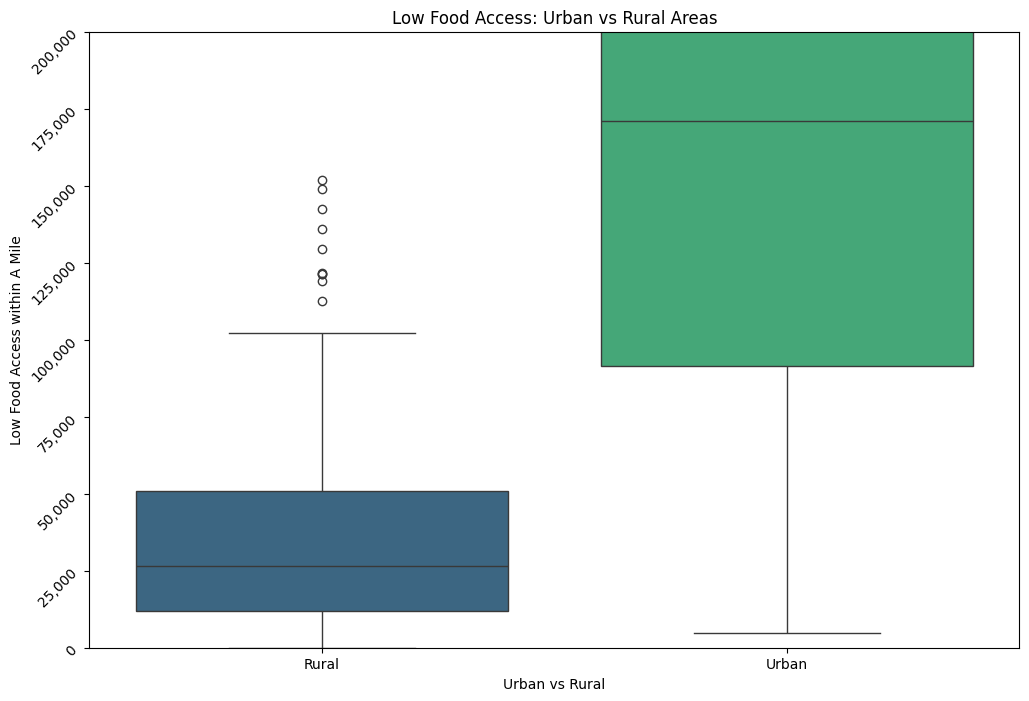

In [8]:
plt.figure(figsize=(12, 8)) # Increase figure size for a wider plot

# Count the 'No' as 'Rural' and 'Yes' as 'Urban' for the x-axis labels
df['urban_rural'] = df['counties_over_300k'].map({'No': 'Rural', 'Yes': 'Urban'})

# Convert 'low_access_population_at_1_mile' to numeric, removing commas
df['low_access_population_at_1_mile'] = df['low_access_population_at_1_mile'].astype(str).str.replace(',', '', regex=False)
df['low_access_population_at_1_mile'] = pd.to_numeric(df['low_access_population_at_1_mile'], errors='coerce')


sns.boxplot(
    data=df,
    x = "urban_rural",
    y = "low_access_population_at_1_mile",
    palette='viridis' # Added viridis palette. Think I like this as the main color theme
)

plt.xlabel("Urban vs Rural")
plt.ylabel("Low Food Access within A Mile")
plt.title("Low Food Access: Urban vs Rural Areas")
plt.yticks(rotation=45) # Rotate y-axis labels for better readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # Add commas to y-axis labels
plt.ylim(0, 200000) # Adjust y-axis limits for better readability
plt.show()

In [9]:
print(df['urban_rural'].value_counts())
print(df['low_access_population_at_1_mile'].dtype)
print(df['low_access_population_at_1_mile'].head())
print(df['low_access_population_at_1_mile'].isnull().sum())

urban_rural
Rural    183
Urban     25
Name: count, dtype: int64
int64
0    102023
1    188452
2    142524
3     27650
4     46218
Name: low_access_population_at_1_mile, dtype: int64
0


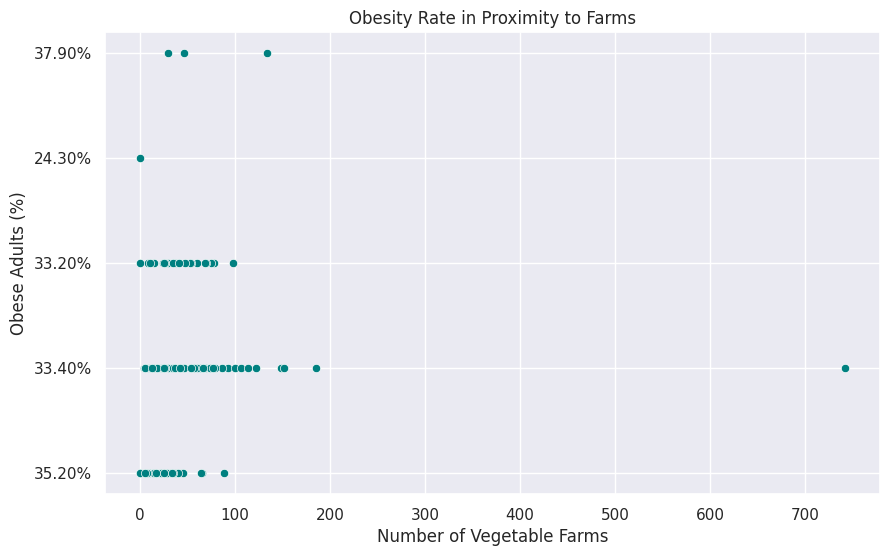

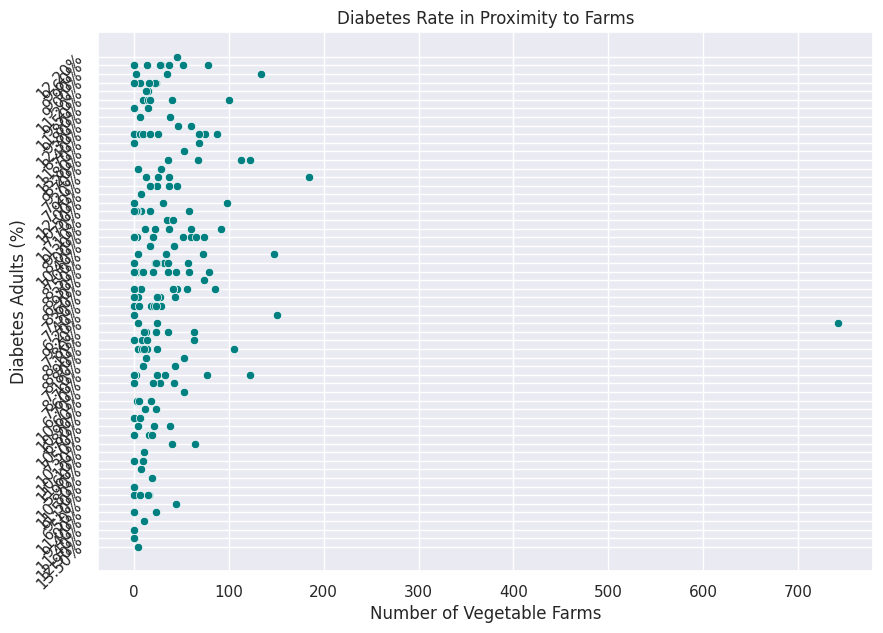

In [10]:
sns.set_theme(style="darkgrid")

# Create scatter plot for vegetable farms vs. obesity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="veg_farms_count", y="obese_adults_pct", color='teal') # Using 'teal' for a blue/green shade
plt.xlabel("Number of Vegetable Farms")
plt.ylabel("Obese Adults (%)")
plt.title("Obesity Rate in Proximity to Farms")
plt.show()

# Create scatter plot for vegetable farms vs. diabetes
plt.figure(figsize=(10, 7)) # Increased figure height. Was unreadable before
sns.scatterplot(data=df, x="veg_farms_count", y="diabetes_adults_pct", color='teal') # Using 'teal' for a blue/green shade. Stay with the color theme
plt.xlabel("Number of Vegetable Farms")
plt.ylabel("Diabetes Adults (%)")
plt.title("Diabetes Rate in Proximity to Farms")
plt.yticks(rotation=45)  # Ensure rotation is still applied
plt.show()

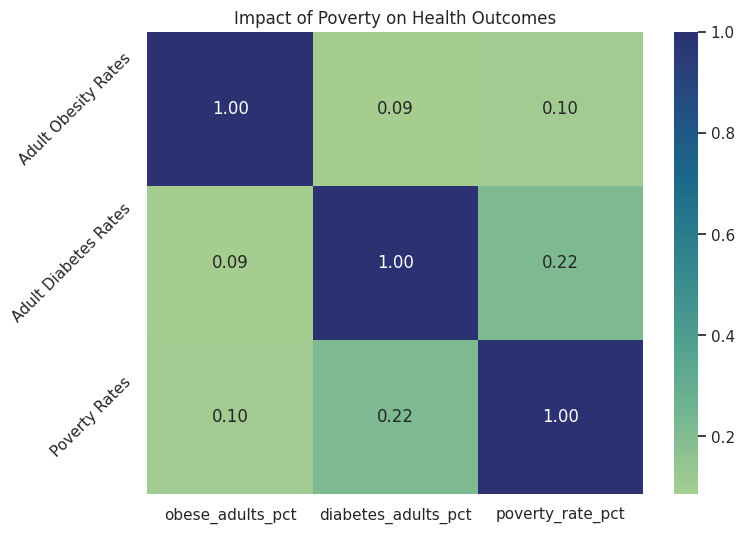

In [11]:
# Select the relevant columns
relevant_cols = ["obese_adults_pct", "diabetes_adults_pct", "poverty_rate_pct"]

# Convert percentage columns to numeric, removing the '%' sign
for col in relevant_cols:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Calculate the correlation matrix
linked_matrix = df[relevant_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(linked_matrix, annot=True, cmap='crest', fmt=".2f") #cmap is the closest to color theme I could find
plt.title('Impact of Poverty on Health Outcomes')
plt.yticks(ticks=np.arange(len(relevant_cols)) + 0.5, labels=['Adult Obesity Rates', 'Adult Diabetes Rates', 'Poverty Rates'], rotation=45)
plt.show()

In [12]:
df_urban = df[df['counties_over_300k'] == 'Yes'].copy()
df_rural = df[df['counties_over_300k'] == 'No'].copy()

display(df_urban.head())
display(df_rural.head())

,fips_code,state,county,counties_over_300k,total_population_00s,diabetes_adults_pct,obese_adults_pct,median_family_income,total_housing_units_00s,poverty_rate_pct,veg_farms_count,housing_units_receiving_snap_benefits,snap_participants_2019,housing_units_without_vehicle,group_quarters_population,group_quarters_pct,low_vehicle_access_pct,low_access_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_12_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_population_at_1_mile,low_access_population_at_1_mile_pct,low_access_population_at_12_mile,low_access_population_at_12_mile_pct,low_access_lowincome_population_at_1_mile,low_access_lowincome_population_at_1_mile_pct,low_access_lowincome_population_at_12_mile,low_access_lowincome_population_at_12_mile_pct,low_access_children_age_017_at_1_mile,low_access_children_age_017_at_1_mile_pct,low_access_children_age_017_at_12_mile,low_access_children_age_017_at_12_mile_pct,seniors_age_population,low_access_seniors_age_65_at_1_mile,low_access_seniors_age_65_at_1_mile_pct,low_access_seniors_age_65_at_12_mile,low_access_seniors_age_65_at_12_mile_pct,white_population,low_access_white_population_at_1_mile,low_access_white_population_at_1_mile_pct,low_access_white_population_at_12_mile,low_access_white_population_at_12_mile_pct,black_population,low_access_black_or_african_american_population_at_1_mile,low_access_black_or_african_american_population_at_1_mile_pct,low_access_black_or_african_american_population_at_12_mile,low_access_black_or_african_american_population_at_12_mile_pct,asian_population,low_access_asian_population_at_1_mile,low_access_asian_population_at_1_mile_pct,low_access_asian_population_at_12_mile,low_access_asian_population_at_12_mile_pct,native_pacific_islander_population,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile_pct,american_indian_and_alaska_native_population,low_access_american_indian_or_alaska_native_population_at_12_mile,low_access_american_indian_or_alaska_native_population_at_12_mile_pct,latino_population,low_access_hispanic_or_latino_population_at_1_mile,low_access_hispanic_or_latino_population_at_1_mile_pct,low_access_hispanic_or_latino_population_at_12_mile,low_access_hispanic_or_latino_population_at_12_mile_pct,multiple_race_population,urban_rural
1,10003000200,Delaware,New Castle County,Yes,"538,479",9.6,37.9,"85,589.74","202,651",13.32,29,"20,424",11.93%,"14,122","17,154",2.88%,25.96%,"153,725","32,430","78,789","32,430",188452,31.26%,"381,853",67.23%,"36,255",6.66%,"83,147",15.81%,"45,612",7.34%,"89,944",15.48%,"66,222","22,834",4.04%,"48,410",9.11%,"352,955","129,411",20.79%,"258,811",44.94%,"127,786","42,506",7.89%,"85,823",16.12%,"23,300","7,935",1.12%,"16,223",2.47%,159,1.06%,1.72%,"1,574","1,023",0.19%,"46,921","10,201",1.74%,"27,361",4.92%,"32,705",Urban
3,11001000100,District of Columbia,District of Columbia,Yes,"601,723",9.0,24.3,"119,155.77","266,707",17.50,0,"39,043",21.25%,"99,637","40,021",5.80%,5.13%,"27,650","9,661","66,866","9,661",27650,5.13%,"196,290",34.28%,"9,661",2.01%,"66,866",12.01%,"7,355",1.41%,"40,157",7.22%,"68,809","3,740",0.64%,"25,843",4.54%,"231,471","7,366",0.91%,"55,192",8.19%,"305,125","18,953",4.00%,"126,644",23.78%,"21,056",375,0.05%,"4,229",0.63%,302,0.78%,1.68%,"2,079",609,0.11%,"54,749",962,0.16%,"11,427",1.83%,"41,690",Urban
5,24003701101,Maryland,Anne Arundel County,Yes,"537,656",9.5,33.2,"113,648.88","199,378",6.20,40,"13,240",10.75%,"7,882","14,133",3.53%,35.30%,"181,107","22,241","51,538","22,241",209639,40.97%,"406,965",77.26%,"25,609",5.14%,"55,237",10.76%,"48,764",9.49%,"94,505",17.70%,"63,664","27,851",5.49%,"49,722",9.85%,"405,456","166,867",32.48%,"316,731",60.72%,"83,484","28,664"

,fips_code,state,county,counties_over_300k,total_population_00s,diabetes_adults_pct,obese_adults_pct,median_family_income,total_housing_units_00s,poverty_rate_pct,veg_farms_count,housing_units_receiving_snap_benefits,snap_participants_2019,housing_units_without_vehicle,group_quarters_population,group_quarters_pct,low_vehicle_access_pct,low_access_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_12_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_population_at_1_mile,low_access_population_at_1_mile_pct,low_access_population_at_12_mile,low_access_population_at_12_mile_pct,low_access_lowincome_population_at_1_mile,low_access_lowincome_population_at_1_mile_pct,low_access_lowincome_population_at_12_mile,low_access_lowincome_population_at_12_mile_pct,low_access_children_age_017_at_1_mile,low_access_children_age_017_at_1_mile_pct,low_access_children_age_017_at_12_mile,low_access_children_age_017_at_12_mile_pct,seniors_age_population,low_access_seniors_age_65_at_1_mile,low_access_seniors_age_65_at_1_mile_pct,low_access_seniors_age_65_at_12_mile,low_access_seniors_age_65_at_12_mile_pct,white_population,low_access_white_population_at_1_mile,low_access_white_population_at_1_mile_pct,low_access_white_population_at_12_mile,low_access_white_population_at_12_mile_pct,black_population,low_access_black_or_african_american_population_at_1_mile,low_access_black_or_african_american_population_at_1_mile_pct,low_access_black_or_african_american_population_at_12_mile,low_access_black_or_african_american_population_at_12_mile_pct,asian_population,low_access_asian_population_at_1_mile,low_access_asian_population_at_1_mile_pct,low_access_asian_population_at_12_mile,low_access_asian_population_at_12_mile_pct,native_pacific_islander_population,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile_pct,american_indian_and_alaska_native_population,low_access_american_indian_or_alaska_native_population_at_12_mile,low_access_american_indian_or_alaska_native_population_at_12_mile_pct,latino_population,low_access_hispanic_or_latino_population_at_1_mile,low_access_hispanic_or_latino_population_at_1_mile_pct,low_access_hispanic_or_latino_population_at_12_mile,low_access_hispanic_or_latino_population_at_12_mile_pct,multiple_race_population,urban_rural
0,10001040100,Delaware,Kent County,No,"182,507",12.2,37.9,"67,659.73","68,443",14.68,46,"11,534",11.93%,"5,153","5,848",3.19%,14.33%,"35,396","10,623","26,093","10,624",102023,53.36%,"150,635",81.26%,"30,935",16.76%,"48,271",27.14%,"24,754",12.41%,"36,292",18.93%,"26,379","14,653",8.37%,"21,753",12.55%,"126,168","78,791",42.03%,"107,007",58.35%,"41,969","16,488",7.99%,"32,478",17.09%,"3,471","1,597",0.76%,"2,759",1.40%,97,0.65%,3.49%,"1,085",983,0.41%,"10,253","4,606",2.33%,"7,706",4.13%,"9,717",Rural
2,10005050101,Delaware,Sussex County,No,"209,232",9.9,37.9,"76,538.44","83,362",10.77,134,"11,421",11.93%,"3,683","5,530",3.40%,32.78%,"56,335","15,217","21,699","13,549",142524,66.61%,"177,621",82.87%,"40,304",17.55%,"50,941",22.13%,"28,888",12.22%,"36,050",15.30%,"42,825","27,538",14.43%,"36,031",18.64%,"160,410","111,026",52.08%,"137,430",64.71%,"32,138","22,010",10.56%,"27,728",13.01%,"1,991","1,136",0.48%,"1,599",0.67%,150,1.24%,5.53%,"1,587","1,201",0.56%,"17,222","9,450",3.95%,"12,401",5.11%,"12,956",Rural
4,24001000100,Maryland,Allegany County,No,"75,087",11.2,33.2,"59,243.17","29,177",16.80,15,"5,359",10.75%,"2,769","7,924",7.52%,26.68%,"21,538","7,316","14,905","6,788",46218,60.00%,"66,461",88.89%,"14,931",19.35%,"23,686",32.25%,"7,852",10.78%,"11,828",16.67%,"13,402","8,027",11.03%,"11,351",15.94%,"66,981","40,583",54.38%,"59,059",80.79%,"6,028","4,586",4.26%,"5,599",5.67%,568,341,

In [13]:
urban_low_access_cols = [
    "low_access_white_population_at_1_mile",
    "low_access_black_or_african_american_population_at_1_mile",
    "low_access_asian_population_at_1_mile",
    "low_access_hispanic_or_latino_population_at_1_mile",
    "low_access_white_population_at_12_mile",
    "low_access_black_or_african_american_population_at_12_mile",
    "low_access_asian_population_at_12_mile",
    "low_access_hispanic_or_latino_population_at_12_mile"
]

rural_low_access_cols = [
    "low_access_white_population_at_1_mile",
    "low_access_black_or_african_american_population_at_1_mile",
    "low_access_asian_population_at_1_mile",
    "low_access_hispanic_or_latino_population_at_1_mile",
    "low_access_white_population_at_12_mile",
    "low_access_black_or_african_american_population_at_12_mile",
    "low_access_asian_population_at_12_mile",
    "low_access_hispanic_or_latino_population_at_12_mile"
]

print("Urban Low Access Columns:", urban_low_access_cols)
print("Rural Low Access Columns:", rural_low_access_cols)

Urban Low Access Columns: ['low_access_white_population_at_1_mile', 'low_access_black_or_african_american_population_at_1_mile', 'low_access_asian_population_at_1_mile', 'low_access_hispanic_or_latino_population_at_1_mile', 'low_access_white_population_at_12_mile', 'low_access_black_or_african_american_population_at_12_mile', 'low_access_asian_population_at_12_mile', 'low_access_hispanic_or_latino_population_at_12_mile']
Rural Low Access Columns: ['low_access_white_population_at_1_mile', 'low_access_black_or_african_american_population_at_1_mile', 'low_access_asian_population_at_1_mile', 'low_access_hispanic_or_latino_population_at_1_mile', 'low_access_white_population_at_12_mile', 'low_access_black_or_african_american_population_at_12_mile', 'low_access_asian_population_at_12_mile', 'low_access_hispanic_or_latino_population_at_12_mile']


In [14]:
# Melt urban data
df_urban_melted = pd.melt(df_urban,
                          id_vars=['fips_code', 'state', 'county'],
                          value_vars=urban_low_access_cols,
                          var_name='low_access_metric',
                          value_name='population')

# Melt rural data
df_rural_melted = pd.melt(df_rural,
                          id_vars=['fips_code', 'state', 'county'],
                          value_vars=rural_low_access_cols,
                          var_name='low_access_metric',
                          value_name='population')

# Add area type column
df_urban_melted['area_type'] = 'Urban'
df_rural_melted['area_type'] = 'Rural'

# Similar to a pivot table in excel, bucket the df together
df_melted = pd.concat([df_urban_melted, df_rural_melted])

# Display the first few rows
display(df_melted.head())

,fips_code,state,county,low_access_metric,population,area_type
0,10003000200,Delaware,New Castle County,low_access_white_population_at_1_mile,"129,411",Urban
1,11001000100,District of Columbia,District of Columbia,low_access_white_population_at_1_mile,"7,366",Urban
2,24003701101,Maryland,Anne Arundel County,low_access_white_population_at_1_mile,"166,867",Urban
3,24005400100,Maryland,Baltimore County,low_access_white_population_at_1_mile,"154,288",Urban
4,24510010100,Maryland,Baltimore city,low_access_white_population_at_1_mile,"9,248",Urban


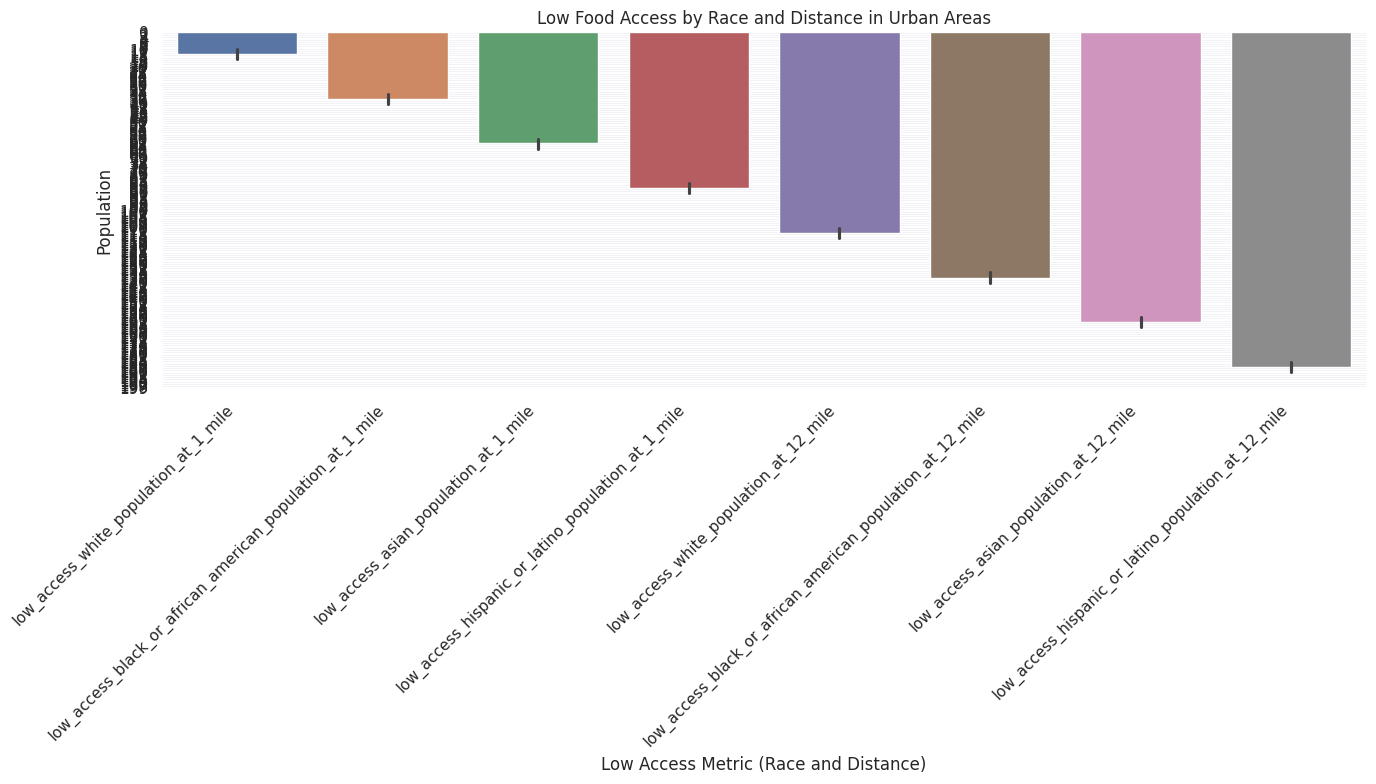

In [36]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_urban_melted, x='low_access_metric', y='population', hue='low_access_metric')
plt.xlabel("Low Access Metric (Race and Distance)")
plt.ylabel("Population")
plt.title("Low Food Access by Race and Distance in Urban Areas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) # Rotate y-axis labels to 0 degrees
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # Add commas to y-axis labels
plt.tight_layout()
plt.show()

Create similar visualizations for rural counties.


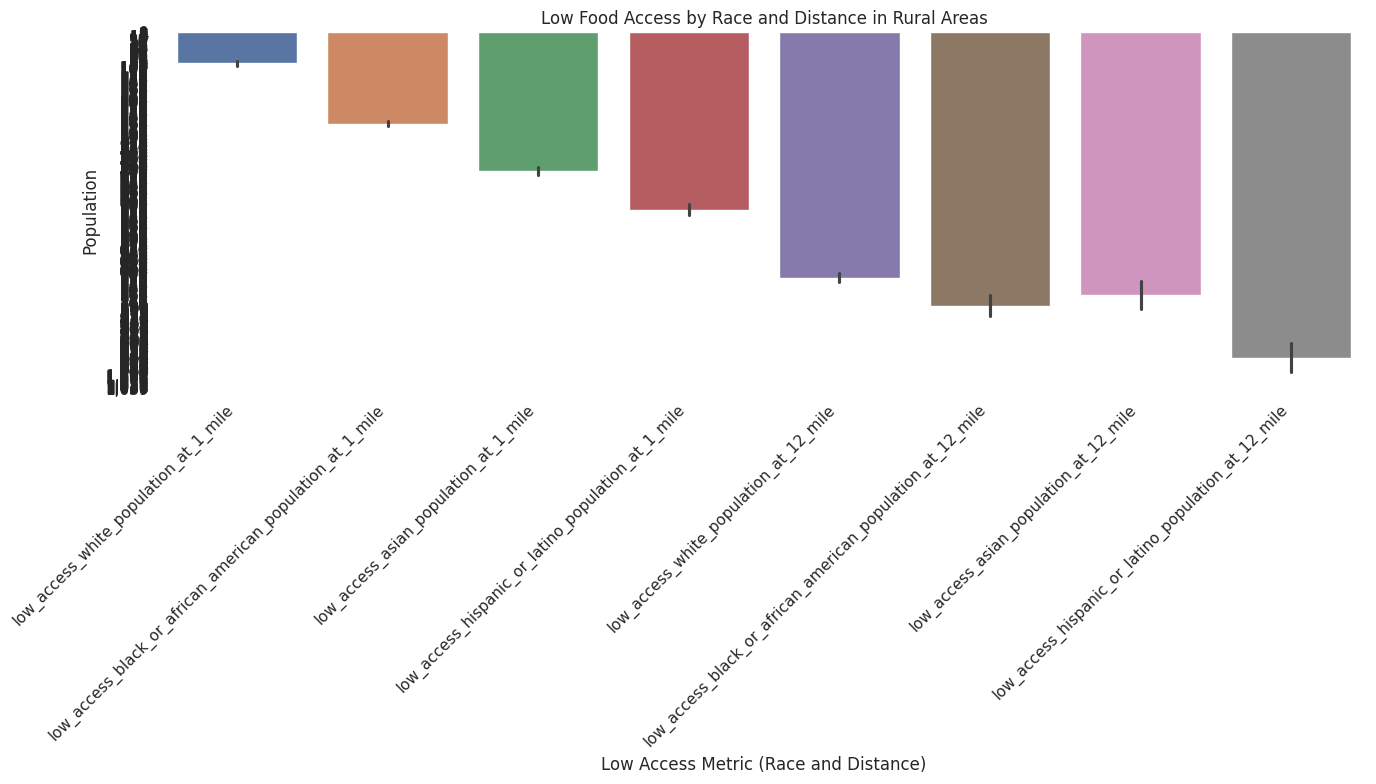

In [37]:
# Use df_rural_melted generated in cell 399b98de
plt.figure(figsize=(14, 8))
sns.barplot(data=df_rural_melted, x='low_access_metric', y='population', hue='low_access_metric')
plt.xlabel("Low Access Metric (Race and Distance)")
plt.ylabel("Population")
plt.title("Low Food Access by Race and Distance in Rural Areas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0) # Rotate y-axis labels to 0 degrees
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # Add commas to y-axis labels
plt.tight_layout()
plt.show()

#Key Findings

*   Both urban and rural areas show populations with low food access at 0.5 and 1-mile distances across all analyzed racial groups (White, Black, Asian, Hispanic/Latino).
*   The visualizations provide a direct comparison of the magnitude of low access populations for each racial group at each distance in urban versus rural settings.
*   Analyzing the generated bar charts allows for the identification of which racial groups experience higher rates of low access and whether this disparity is more pronounced in urban or rural environments, or at the 0.5-mile versus 1-mile distance.

### Path Forward

*   Further quantitative analysis, such as calculating the proportion of each racial group's total population experiencing low access, would provide a more accurate comparison than just absolute numbers.
*   Investigating other factors in the dataset, such as income levels or vehicle availability, could provide deeper insights into the causes of low food access disparities in urban and rural areas.


In [17]:
df_urban = df[df['counties_over_300k'] == 'Yes'].copy()
df_rural = df[df['counties_over_300k'] == 'No'].copy()

display(df_urban.head())
display(df_rural.head())

,fips_code,state,county,counties_over_300k,total_population_00s,diabetes_adults_pct,obese_adults_pct,median_family_income,total_housing_units_00s,poverty_rate_pct,veg_farms_count,housing_units_receiving_snap_benefits,snap_participants_2019,housing_units_without_vehicle,group_quarters_population,group_quarters_pct,low_vehicle_access_pct,low_access_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_12_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_population_at_1_mile,low_access_population_at_1_mile_pct,low_access_population_at_12_mile,low_access_population_at_12_mile_pct,low_access_lowincome_population_at_1_mile,low_access_lowincome_population_at_1_mile_pct,low_access_lowincome_population_at_12_mile,low_access_lowincome_population_at_12_mile_pct,low_access_children_age_017_at_1_mile,low_access_children_age_017_at_1_mile_pct,low_access_children_age_017_at_12_mile,low_access_children_age_017_at_12_mile_pct,seniors_age_population,low_access_seniors_age_65_at_1_mile,low_access_seniors_age_65_at_1_mile_pct,low_access_seniors_age_65_at_12_mile,low_access_seniors_age_65_at_12_mile_pct,white_population,low_access_white_population_at_1_mile,low_access_white_population_at_1_mile_pct,low_access_white_population_at_12_mile,low_access_white_population_at_12_mile_pct,black_population,low_access_black_or_african_american_population_at_1_mile,low_access_black_or_african_american_population_at_1_mile_pct,low_access_black_or_african_american_population_at_12_mile,low_access_black_or_african_american_population_at_12_mile_pct,asian_population,low_access_asian_population_at_1_mile,low_access_asian_population_at_1_mile_pct,low_access_asian_population_at_12_mile,low_access_asian_population_at_12_mile_pct,native_pacific_islander_population,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile_pct,american_indian_and_alaska_native_population,low_access_american_indian_or_alaska_native_population_at_12_mile,low_access_american_indian_or_alaska_native_population_at_12_mile_pct,latino_population,low_access_hispanic_or_latino_population_at_1_mile,low_access_hispanic_or_latino_population_at_1_mile_pct,low_access_hispanic_or_latino_population_at_12_mile,low_access_hispanic_or_latino_population_at_12_mile_pct,multiple_race_population,urban_rural
1,10003000200,Delaware,New Castle County,Yes,"538,479",9.6,37.9,"85,589.74","202,651",13.32,29,"20,424",11.93%,"14,122","17,154",2.88%,25.96%,"153,725","32,430","78,789","32,430",188452,31.26%,"381,853",67.23%,"36,255",6.66%,"83,147",15.81%,"45,612",7.34%,"89,944",15.48%,"66,222","22,834",4.04%,"48,410",9.11%,"352,955","129,411",20.79%,"258,811",44.94%,"127,786","42,506",7.89%,"85,823",16.12%,"23,300","7,935",1.12%,"16,223",2.47%,159,1.06%,1.72%,"1,574","1,023",0.19%,"46,921","10,201",1.74%,"27,361",4.92%,"32,705",Urban
3,11001000100,District of Columbia,District of Columbia,Yes,"601,723",9.0,24.3,"119,155.77","266,707",17.50,0,"39,043",21.25%,"99,637","40,021",5.80%,5.13%,"27,650","9,661","66,866","9,661",27650,5.13%,"196,290",34.28%,"9,661",2.01%,"66,866",12.01%,"7,355",1.41%,"40,157",7.22%,"68,809","3,740",0.64%,"25,843",4.54%,"231,471","7,366",0.91%,"55,192",8.19%,"305,125","18,953",4.00%,"126,644",23.78%,"21,056",375,0.05%,"4,229",0.63%,302,0.78%,1.68%,"2,079",609,0.11%,"54,749",962,0.16%,"11,427",1.83%,"41,690",Urban
5,24003701101,Maryland,Anne Arundel County,Yes,"537,656",9.5,33.2,"113,648.88","199,378",6.20,40,"13,240",10.75%,"7,882","14,133",3.53%,35.30%,"181,107","22,241","51,538","22,241",209639,40.97%,"406,965",77.26%,"25,609",5.14%,"55,237",10.76%,"48,764",9.49%,"94,505",17.70%,"63,664","27,851",5.49%,"49,722",9.85%,"405,456","166,867",32.48%,"316,731",60.72%,"83,484","28,664"

,fips_code,state,county,counties_over_300k,total_population_00s,diabetes_adults_pct,obese_adults_pct,median_family_income,total_housing_units_00s,poverty_rate_pct,veg_farms_count,housing_units_receiving_snap_benefits,snap_participants_2019,housing_units_without_vehicle,group_quarters_population,group_quarters_pct,low_vehicle_access_pct,low_access_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_12_mile_for_urban_areas_and_10_miles_for_rural_areas,low_access_lowincome_population_at_1_mile_for_urban_areas_and_20_miles_for_rural_areas,low_access_population_at_1_mile,low_access_population_at_1_mile_pct,low_access_population_at_12_mile,low_access_population_at_12_mile_pct,low_access_lowincome_population_at_1_mile,low_access_lowincome_population_at_1_mile_pct,low_access_lowincome_population_at_12_mile,low_access_lowincome_population_at_12_mile_pct,low_access_children_age_017_at_1_mile,low_access_children_age_017_at_1_mile_pct,low_access_children_age_017_at_12_mile,low_access_children_age_017_at_12_mile_pct,seniors_age_population,low_access_seniors_age_65_at_1_mile,low_access_seniors_age_65_at_1_mile_pct,low_access_seniors_age_65_at_12_mile,low_access_seniors_age_65_at_12_mile_pct,white_population,low_access_white_population_at_1_mile,low_access_white_population_at_1_mile_pct,low_access_white_population_at_12_mile,low_access_white_population_at_12_mile_pct,black_population,low_access_black_or_african_american_population_at_1_mile,low_access_black_or_african_american_population_at_1_mile_pct,low_access_black_or_african_american_population_at_12_mile,low_access_black_or_african_american_population_at_12_mile_pct,asian_population,low_access_asian_population_at_1_mile,low_access_asian_population_at_1_mile_pct,low_access_asian_population_at_12_mile,low_access_asian_population_at_12_mile_pct,native_pacific_islander_population,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile,low_access_native_hawaiian_or_other_pacific_islander_population_at_12_mile_pct,american_indian_and_alaska_native_population,low_access_american_indian_or_alaska_native_population_at_12_mile,low_access_american_indian_or_alaska_native_population_at_12_mile_pct,latino_population,low_access_hispanic_or_latino_population_at_1_mile,low_access_hispanic_or_latino_population_at_1_mile_pct,low_access_hispanic_or_latino_population_at_12_mile,low_access_hispanic_or_latino_population_at_12_mile_pct,multiple_race_population,urban_rural
0,10001040100,Delaware,Kent County,No,"182,507",12.2,37.9,"67,659.73","68,443",14.68,46,"11,534",11.93%,"5,153","5,848",3.19%,14.33%,"35,396","10,623","26,093","10,624",102023,53.36%,"150,635",81.26%,"30,935",16.76%,"48,271",27.14%,"24,754",12.41%,"36,292",18.93%,"26,379","14,653",8.37%,"21,753",12.55%,"126,168","78,791",42.03%,"107,007",58.35%,"41,969","16,488",7.99%,"32,478",17.09%,"3,471","1,597",0.76%,"2,759",1.40%,97,0.65%,3.49%,"1,085",983,0.41%,"10,253","4,606",2.33%,"7,706",4.13%,"9,717",Rural
2,10005050101,Delaware,Sussex County,No,"209,232",9.9,37.9,"76,538.44","83,362",10.77,134,"11,421",11.93%,"3,683","5,530",3.40%,32.78%,"56,335","15,217","21,699","13,549",142524,66.61%,"177,621",82.87%,"40,304",17.55%,"50,941",22.13%,"28,888",12.22%,"36,050",15.30%,"42,825","27,538",14.43%,"36,031",18.64%,"160,410","111,026",52.08%,"137,430",64.71%,"32,138","22,010",10.56%,"27,728",13.01%,"1,991","1,136",0.48%,"1,599",0.67%,150,1.24%,5.53%,"1,587","1,201",0.56%,"17,222","9,450",3.95%,"12,401",5.11%,"12,956",Rural
4,24001000100,Maryland,Allegany County,No,"75,087",11.2,33.2,"59,243.17","29,177",16.80,15,"5,359",10.75%,"2,769","7,924",7.52%,26.68%,"21,538","7,316","14,905","6,788",46218,60.00%,"66,461",88.89%,"14,931",19.35%,"23,686",32.25%,"7,852",10.78%,"11,828",16.67%,"13,402","8,027",11.03%,"11,351",15.94%,"66,981","40,583",54.38%,"59,059",80.79%,"6,028","4,586",4.26%,"5,599",5.67%,568,341,

In [18]:
low_access_1mile_cols = [
    "low_access_white_population_at_1_mile",
    "low_access_black_or_african_american_population_at_1_mile",
    "low_access_asian_population_at_1_mile",
    "low_access_hispanic_or_latino_population_at_1_mile"
]

print("Low Access 1 Mile Columns:", low_access_1mile_cols)

Low Access 1 Mile Columns: ['low_access_white_population_at_1_mile', 'low_access_black_or_african_american_population_at_1_mile', 'low_access_asian_population_at_1_mile', 'low_access_hispanic_or_latino_population_at_1_mile']


In [24]:
# Melt or pivot the df
df_melted = pd.melt(df,
                    id_vars=['fips_code', 'state', 'county', 'counties_over_300k'],
                    value_vars=low_access_1mile_cols,
                    var_name='low_access_metric',
                    value_name='population')

# Convert the 'population' column to numeric
df_melted['population'] = df_melted['population'].str.replace(',', '', regex=False)
df_melted['population'] = pd.to_numeric(df_melted['population'], errors='coerce')

# Rename the 'counties_over_300k' column to 'area_type'
df_melted = df_melted.rename(columns={'counties_over_300k': 'area_type'})

# Display the first few rows of the melted dataframe
display(df_melted.head())

,fips_code,state,county,area_type,low_access_metric,population
0,10001040100,Delaware,Kent County,No,low_access_white_population_at_1_mile,78791
1,10003000200,Delaware,New Castle County,Yes,low_access_white_population_at_1_mile,129411
2,10005050101,Delaware,Sussex County,No,low_access_white_population_at_1_mile,111026
3,11001000100,District of Columbia,District of Columbia,Yes,low_access_white_population_at_1_mile,7366
4,24001000100,Maryland,Allegany County,No,low_access_white_population_at_1_mile,40583


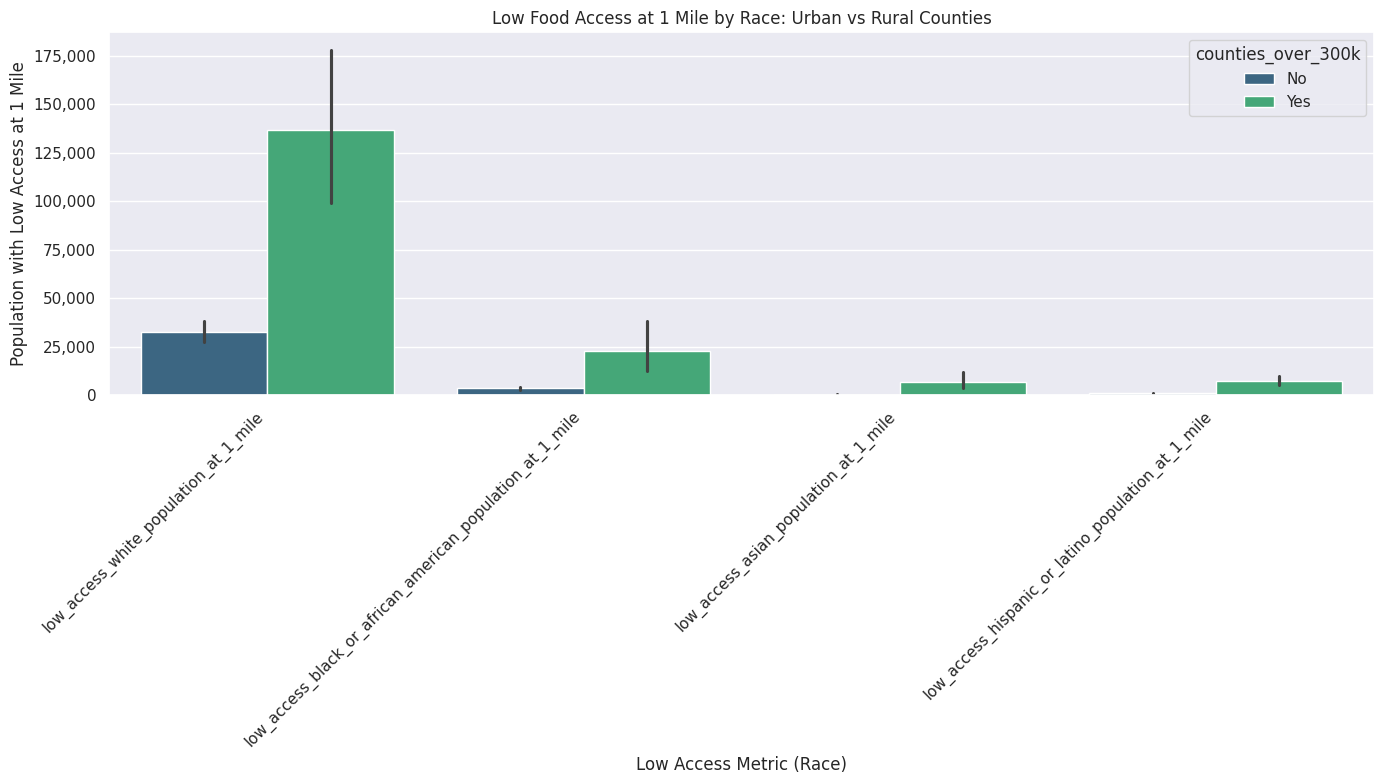

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='low_access_metric', y='population', hue='counties_over_300k', palette='viridis')
plt.xlabel("Low Access Metric (Race)")
plt.ylabel("Population with Low Access at 1 Mile")
plt.title("Low Food Access at 1 Mile by Race: Urban vs Rural Counties")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # Add commas to y-axis labels
plt.tight_layout()
plt.show()

## Key Findings

*   Low access populations at 1 mile are significantly higher in urban counties compared to rural counties across all racial groups (White, Black, Asian, and Hispanic/Latino).
*   Within urban counties, the Black population has the highest number of individuals with low access at 1 mile, followed by White, Hispanic/Latino, and then Asian populations.
*   In rural counties, the White population has the highest number of individuals with low access at 1 mile, followed by the Black population. Hispanic/Latino and Asian populations have considerably lower numbers with low access in rural areas compared to White and Black populations.

### Path Forward

*   Further analysis could explore the underlying factors contributing to the higher low access rates in urban areas for all groups and the specific disparities observed among racial groups.
*   Investigating the density of food retailers and transportation options in urban versus rural low-access areas could provide actionable insights for targeted interventions.


#I really want a map!

In [28]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import zipfile
import os
from IPython.display import display

# ---- Paths (Colab) ----
CSV_PATH = "/content/Food Access Research Atlas 2019 DMV Clean (agg).csv"
ZIP_PATH = "/content/cb_2019_us_county_500k.zip"  # download this county shapefile from TIGER/Cartographic

# ---- Load CSV and ensure 5-digit county FIPS ----
df = pd.read_csv(CSV_PATH)
# If you have separate state_fips + county_fips columns, combine them; otherwise adapt to your column names
if "fips_code" in df.columns:
    df["county_fips"] = df["fips_code"].astype(str).str.zfill(5)
elif {"state_fips","county_fips"}.issubset(df.columns):
    df["county_fips"] = df["state_fips"].astype(str).zfill(2) + df["county_fips"].astype(str).zfill(3)
else:
    raise ValueError("Need a 5-digit county fips column (e.g., 'fips_code')")

# Convert percentage columns to numeric in the original df before merging
for col in ["low_access_population_at_1_mile_pct", "poverty_rate_pct"]:
    if col in df.columns:
      df[col] = df[col].astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False)
      df[col] = pd.to_numeric(df[col], errors='coerce')


# Read counties from zip file from census
gdf_counties = gpd.read_file(f"zip://{ZIP_PATH}!cb_2019_us_county_500k.shp")


# Keep midatlantic states (MD=24, VA=51, DC=11, PA=42)
dmv_states = {"24": "MD", "51": "VA", "11": "DC", "42": "PA"}
gdf_counties = gdf_counties[gdf_counties["STATEFP"].isin(dmv_states.keys())].copy()
gdf_counties["STATE_ABBR"] = gdf_counties["STATEFP"].map(dmv_states)
gdf_counties["county_fips"] = gdf_counties["STATEFP"] + gdf_counties["COUNTYFP"]

# Merge county_fips
gdf = gdf_counties.merge(df, on="county_fips", how="left")

print("Merged rows:", gdf.shape, "Match rate:", gdf[gdf.columns[-1]].notna().mean())

# Position labels correctly
gdf_proj = gdf.to_crs(3857)
state_polys = gdf_proj.dissolve(by="STATE_ABBR")
state_centroids = state_polys.centroid.to_crs(4326)
label_df = state_centroids.apply(lambda geom: pd.Series({"lon": geom.x, "lat": geom.y}))
label_df["STATE_ABBR"] = label_df.index

# Plotly choropleth (COUNTIES)
fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.__geo_interface__,
    locations="county_fips",                      # column in gdf
    featureidkey="properties.GEOID",        # property in geojson features
    color="low_access_population_at_1_mile_pct",  # pick your metric
    hover_name="NAME",                      # tract name
    hover_data={"STATE_ABBR": True, "COUNTYFP": True, "poverty_rate_pct": True},
    mapbox_style="carto-positron",
    zoom=6.2,
    center={"lat": 38.9, "lon": -77.0},
    opacity=0.6,
    title="Low Food Access by County (2019) — DMV",
)

# ---- Add state labels ----
fig.add_scattermapbox(
    lat=label_df["lat"], lon=label_df["lon"],
    mode="text", text=label_df["STATE_ABBR"],
    textfont=dict(size=12, color="black"),
    showlegend=False,
)

fig.show()

DataSourceError: '/vsizip//content/cb_2019_us_county_500k.zip/cb_2019_us_county_500k.shp' does not exist in the file system, and is not recognized as a supported dataset name.

### A failed attempt at a map or choropleth above but it is overly complicated and uses code I am not entirely comfortable repeating.



In [39]:
import os, re
import pandas as pd
import geopandas as gpd
import plotly.express as px
import zipfile
import os
from IPython.display import display

CSV_CANDIDATES = [
    "/content/Food Access Research Atlas 2019 DMV Clean (agg).csv",
    "/mnt/data/Food Access Research Atlas 2019 DMV Clean (agg).csv",
]
CSV_PATH = next((p for p in CSV_CANDIDATES if os.path.exists(p)), None)
if CSV_PATH is None:
    raise FileNotFoundError("CSV not found. Upload to /content and update CSV_PATH.")

df = pd.read_csv(CSV_PATH)

# Find state and county columns. census data may be labeled differently than my dataset
possible_state = ["state","State","STATE","state_name","st"]
possible_county = ["county","County","COUNTY","county_name"]

def pick(cols, options):
    for c in options:
        if c in cols: return c
    return None

state_col = pick(df.columns, possible_state)
county_col = pick(df.columns, possible_county)
if not state_col or not county_col:
    raise ValueError(f"Your CSV needs 'state' and 'county' columns. Found: {list(df.columns)}")


metric_candidates = [
    "low_access_population",
    "low_access_population_at_1_mile_pct",
    "low_access_population_pct",
    "low_access_pop",
    "low_access_pct",
]
metric = next((c for c in metric_candidates if c in df.columns), None)
if metric is None:
    raise ValueError(f"Add one of these metric columns to your CSV (or rename in code): {metric_candidates}")

# Convert percentage columns to numeric before merging
for col in [metric, "poverty_rate_pct"]:
    if col in df.columns:
      df[col] = df[col].astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False)
      df[col] = pd.to_numeric(df[col], errors='coerce')


# Download county shapes
# 2019 counties (cartographic boundaries) # Best to use 2019 data since my dataset only goes to 2019
zip_url = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip"
zip_path = "/content/cb_2019_us_county_500k.zip"
if not os.path.exists(zip_path):
    print(f"Downloading {os.path.basename(zip_path)}...")
    !wget -q {zip_url} -O {zip_path}
    print("Download complete.")

gdf_counties = gpd.read_file(f"zip://{zip_path}!cb_2019_us_county_500k.shp")

# Filter to DC, DE, MD, PA, VA. The mid-atlantic states
state_to_fips = {
    "DC": "11", "DE": "10", "MD": "24", "PA": "42", "VA": "51",
    "DISTRICT OF COLUMBIA": "11", "DELAWARE": "10", "MARYLAND": "24",
    "PENNSYLVANIA": "42", "VIRGINIA": "51"
}
keep_statefps = {"10","11","24","42","51"}
gdf_counties = gdf_counties[gdf_counties["STATEFP"].isin(keep_statefps)].copy()

def norm_county_name(s: str) -> str:
    if pd.isna(s): return ""
    s = str(s).strip().upper()
    # remove common suffixes
    s = re.sub(r"\b(COUNTY|PARISH|BOROUGH|CENSUS AREA|MUNICIPALITY|CITY AND BOROUGH|CITY|CITY OF)\b", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    # normalize Saint/St.
    s = s.replace("SAINT ", "ST ").replace("ST. ", "ST ")
    return s

# Normalize CSV state -> 2-digit FIPS, keep only our 5 states
df["_STATE_KEY"] = df[state_col].astype(str).str.strip().str.upper().map(state_to_fips)
df = df[df["_STATE_KEY"].isin(set(keep_statefps))].copy()

# Normalize county names (drop trailing "CITY" too)
df["_COUNTY_KEY"] = df[county_col].apply(norm_county_name).str.replace(r"\bCITY\b","", regex=True).str.strip()

# Shapes keys
gdf_counties["_STATE_KEY"] = gdf_counties["STATEFP"]
gdf_counties["_COUNTY_KEY"] = gdf_counties["NAME"].apply(norm_county_name).str.replace(r"\bCITY\b","", regex=True).str.strip()

# DC edge case: force a single county key
gdf_counties.loc[gdf_counties["_STATE_KEY"]=="11", "_COUNTY_KEY"] = "DISTRICT OF COLUMBIA"

# ---------------- 5) Merge by keys ----------------
gdf = gdf_counties.merge(df, on=["_STATE_KEY","_COUNTY_KEY"], how="left", suffixes=("","_csv"))

total = len(gdf)
matched = gdf[metric].notna().sum()
print(f"Merged county polygons: {total} | Rows with data: {matched} ({matched/total:.1%})")

# Show a few unmatched
if matched/total < 0.9:
    print("\nExamples of unmatched (first 10):")
    display(gdf[gdf[metric].isna()][["STATEFP","NAME"]].head(10))


# Project to meters, simplify, then back to WGS84
try:
    gdf_3857 = gdf.to_crs(3857)
    gdf_3857["geometry"] = gdf_3857["geometry"].simplify(tolerance=1000)  # ~1 km
    gdf = gdf_3857.to_crs(4326)
except Exception as e:
    print("Simplify skipped:", e)


title = f"Low Access Population — DC / DE / MD / PA / VA"
fig = px.choropleth(
    gdf,
    geojson=gdf.__geo_interface__,
    locations=gdf.index,
    color=metric,
    color_continuous_scale="YlOrRd",
    hover_name="NAME",
    hover_data={
        metric: True,
        county_col: True if county_col in gdf.columns else False,
        state_col: True if state_col in gdf.columns else False
    },
    title=title
)
fig.update_geos(fitbounds="locations")
fig.show()

out_html = "/content/low_access_county_map.html"
fig.write_html(out_html)
print(f"✅ Saved: {out_html} (open from left Files pane or download)")

Merged county polygons: 236 | Rows with data: 217 (91.9%)


✅ Saved: /content/low_access_county_map.html (open from left Files pane or download)


Lots of trial and error but good practice